# Low effort ML model

In [249]:
import pandas as pd
import spacy
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

In [250]:
pd.set_option('max_colwidth', 800)

In [251]:
tagged = pd.read_csv('Train_Tagged_Titles.tsv', sep='\t', quoting=3)
tagged

,Record Number,Title,Token,Tag
0,1,Supreme Nike SB Dunk High By any Means Red US10 EU44 Supreme Box Logo Air Force,Supreme,Modell
1,1,Supreme Nike SB Dunk High By any Means Red US10 EU44 Supreme Box Logo Air Force,Nike,Marke
2,1,Supreme Nike SB Dunk High By any Means Red US10 EU44 Supreme Box Logo Air Force,SB,Produktlinie
3,1,Supreme Nike SB Dunk High By any Means Red US10 EU44 Supreme Box Logo Air Force,Dunk,NaN
4,1,Supreme Nike SB Dunk High By any Means Red US10 EU44 Supreme Box Logo Air Force,High,Schuhschaft-Typ
...,...,...,...,...
55178,5000,Herren Trekking Schuhe Outdoor Sneaker Sportschuhe Wanderschuh Big Size U37,Sportschuhe,Produktart
55179,5000,Herren Trekking Schuhe Outdoor Sneaker Sportschuhe Wanderschuh Big Size U37,Wanderschuh,NaN
55180,5000,Herren Trekking Schuhe Outdoor Sneaker Sportschuhe Wanderschuh Big Size U37,Big,No Tag
55181,5000,Herren Trekking Schuhe Outdoor Sneaker Sportschuhe Wanderschuh Big Size U37,Size,No Tag


In [252]:
tagged.Tag.ffill(inplace=True)

In [253]:
le = preprocessing.LabelEncoder()

In [254]:
tagged['Token'] = (tagged['Token'])

In [255]:
x = tagged.drop(['Record Number', 'Title', 'Tag'], axis=1).astype(str)
y = tagged['Tag']

In [256]:
le.fit(x)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [257]:
x['Token'] = le.transform(x)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [258]:
x_train, x_test = x[:44137], x[44137:]
y_train, y_test = y[:44137], y[44137:]

In [259]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

In [260]:
clf.score(x_test, y_test)

0.8942603657432555

In [261]:
prediction = clf.predict(x_test)

In [262]:
x_test['Token'] = le.inverse_transform(x_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/h0/nzgfh7jn2hn9gv84q539nk6m0000gn/T/ipykernel_7314/3893261453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Token'] = le.inverse_transform(x_test)


In [263]:
x_test

,Token
44137,Adidas
44138,Springblade
44139,Solyce
44140,Laufschuhe
44141,Sneaker
...,...
55178,Sportschuhe
55179,Wanderschuh
55180,Big
55181,Size


In [264]:
y_test

44137         Marke
44138        Modell
44139        Modell
44140    Produktart
44141          Stil
            ...    
55178    Produktart
55179    Produktart
55180        No Tag
55181        No Tag
55182        No Tag
Name: Tag, Length: 11046, dtype: object

In [265]:
prediction

array(['Marke', 'Modell', 'Modell', ..., 'Modell', 'No Tag',
       'Herstellernummer'], dtype=object)

In [266]:
test_df = pd.DataFrame()
test_df['Token'] = x_test['Token']
test_df['Tag'] = y_test
test_df['Prediction'] = prediction
test_df = test_df.join(tagged[['Title']])
test_df = test_df[['Title', 'Token', 'Tag', 'Prediction']]

In [267]:
test_df[0:50]

,Title,Token,Tag,Prediction
44137,Adidas Springblade Solyce Laufschuhe Sneaker Turnschuhe AF6800 Gr . 41 43 44 NEU,Adidas,Marke,Marke
44138,Adidas Springblade Solyce Laufschuhe Sneaker Turnschuhe AF6800 Gr . 41 43 44 NEU,Springblade,Modell,Modell
44139,Adidas Springblade Solyce Laufschuhe Sneaker Turnschuhe AF6800 Gr . 41 43 44 NEU,Solyce,Modell,Modell
44140,Adidas Springblade Solyce Laufschuhe Sneaker Turnschuhe AF6800 Gr . 41 43 44 NEU,Laufschuhe,Produktart,Produktart
44141,Adidas Springblade Solyce Laufschuhe Sneaker Turnschuhe AF6800 Gr . 41 43 44 NEU,Sneaker,Stil,Stil
44142,Adidas Springblade Solyce Laufschuhe Sneaker Turnschuhe AF6800 Gr . 41 43 44 NEU,Turnschuhe,Produktart,Produktart
44143,Adidas Springblade Solyce Laufschuhe Sneaker Turnschuhe AF6800 Gr . 41 43 44 NEU,AF6800,Herstellernummer,Herstellernummer
44144,Adidas Springblade Solyce Laufschuhe Sneaker Turnschuhe AF6800 Gr . 41 43 44 NEU,Gr,No Tag,No Tag
44145,Adidas Springblade Solyce Laufschuhe Sneaker Turnschuhe AF6800 Gr . 41 43 44 NEU,.,No Tag,No Tag
44146,Adidas Springblade Solyce Laufschuhe Sneaker Turnschuhe AF6800 Gr . 41 43 44 NEU,41,EU-Schuhgröße,EU-Schuhgröße


In [277]:
diff = test_df[test_df['Tag'] != test_df['Prediction']]
diff[0:50]

,Title,Token,Tag,Prediction
44162,"Vans SK8 HI Reissue DX Herren Schuhe Canvas Boots 40,5 bis 47 Crau Creme Checker",Crau,Farbe,No Tag
44164,"Vans SK8 HI Reissue DX Herren Schuhe Canvas Boots 40,5 bis 47 Crau Creme Checker",Checker,Muster,Modell
44184,Dockers Damen Schuhe Sneaker Turnschuhe 42BM218-680 ( schwarz 100 ),100,No Tag,Herstellernummer
44197,Salomon Contragrip Outdoor Wander Trekking Trail Damen Berg Schuhe EU 39 2008,2008,Erscheinungsjahr,Modell
44221,Skechers Work COTTONWOOD ELKS Sneakers Herren Schwarz 77041EC,Work,Anlass,Modell
44222,Skechers Work COTTONWOOD ELKS Sneakers Herren Schwarz 77041EC,COTTONWOOD,Modell,Marke
44227,Skechers Work COTTONWOOD ELKS Sneakers Herren Schwarz 77041EC,77041EC,Herstellernummer,Modell
44248,Damen Sneakers High Top Sportschuhe Karo Schnürer 75453 Trendy Neu,Karo,Muster,Modell
44257,Asics Gel Noosa TRI 11 Herrenlaufschuhe Running ( 1011A631-001 ) Größe 44 neu in,11,Modell,US-Schuhgröße
44276,"Adidas Tubular X 45 46 46,5 47 S74926 shadow radial yeezy runner doom pk",radial,Modell,Produktlinie


# 379/1000 titles are labeled correctly

In [269]:
len(test_df.Title.unique())

1000

In [270]:
len(diff.Title.unique())

621

# Most titles only have 1 - 3 mislabeled tokens

<Axes: xlabel='Token', ylabel='Count'>

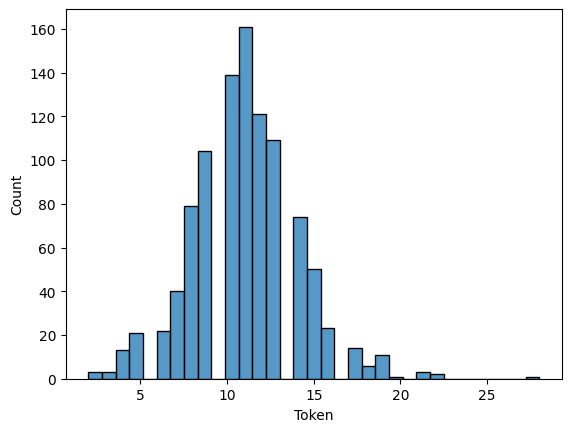

In [271]:
sns.histplot(test_df.groupby('Title').count()['Token'])

<Axes: xlabel='Token', ylabel='Count'>

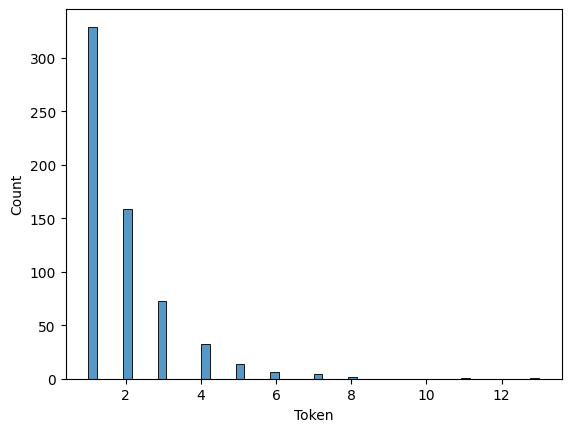

In [272]:
sns.histplot(diff.groupby('Title').count()['Token'])

# Frequency

In [291]:
test_df[test_df['Prediction']== 'Erscheinungsjahr']

,Title,Token,Tag,Prediction
45234,"Adidas Ivan Lendl Supreme Tennis 2005 vintage colourway US 12,5 UK 12 EUR 47,5",2005,Erscheinungsjahr,Erscheinungsjahr
45316,Nike React Hyperdunk 2017 ( Getragen beim Für Euch Alle Videodreh ) Gr . 46,2017,Erscheinungsjahr,Erscheinungsjahr
45355,2022 New Balance 574 Schuhe Herren Damen Freizeit Running Sneaker Schuhe,2022,Erscheinungsjahr,Erscheinungsjahr
45791,WMNS Nike Air Max 2017 Gr . wählbar Neu & OVP 849560 146,2017,Erscheinungsjahr,Erscheinungsjahr
46047,"Adidas Originals Schuh Allround Re-Edition 2013 rar US10 ,5 F44 2/3 D10 NEU",2013,Erscheinungsjahr,Erscheinungsjahr
46938,"Adidas Chile 62 Gr 40 UK 6,5 braun 2004 Rom 020928 Retro Sneaker Vintage Samba",2004,Erscheinungsjahr,Erscheinungsjahr
47462,Nike Dunk High Cargo Khaki 2021 GS DB2179 105 Neu OVP Sneaker Händler,2021,Erscheinungsjahr,Erscheinungsjahr
48920,Nike Air VaporMax 2021 FK FlyKnit Herren Sneaker Weiß DH4084-100 Sport Schuhe,2021,Erscheinungsjahr,Erscheinungsjahr
50218,"NIKE x STÜSSY SKY FORCE 88 MID Gr .42,5 UK .8 Release 2011 hellbraun 454452-200",2011,Erscheinungsjahr,Erscheinungsjahr
50604,Nike Air VaporMax 2019 Obsidian Blue CK0903 400 UK_8 US_9 Eur 42.5,2019,Erscheinungsjahr,Erscheinungsjahr


In [290]:
test_df[test_df['Tag']== 'Erscheinungsjahr']

,Title,Token,Tag,Prediction
44197,Salomon Contragrip Outdoor Wander Trekking Trail Damen Berg Schuhe EU 39 2008,2008,Erscheinungsjahr,Modell
45234,"Adidas Ivan Lendl Supreme Tennis 2005 vintage colourway US 12,5 UK 12 EUR 47,5",2005,Erscheinungsjahr,Erscheinungsjahr
45316,Nike React Hyperdunk 2017 ( Getragen beim Für Euch Alle Videodreh ) Gr . 46,2017,Erscheinungsjahr,Erscheinungsjahr
45355,2022 New Balance 574 Schuhe Herren Damen Freizeit Running Sneaker Schuhe,2022,Erscheinungsjahr,Erscheinungsjahr
45791,WMNS Nike Air Max 2017 Gr . wählbar Neu & OVP 849560 146,2017,Erscheinungsjahr,Erscheinungsjahr
46047,"Adidas Originals Schuh Allround Re-Edition 2013 rar US10 ,5 F44 2/3 D10 NEU",2013,Erscheinungsjahr,Erscheinungsjahr
46938,"Adidas Chile 62 Gr 40 UK 6,5 braun 2004 Rom 020928 Retro Sneaker Vintage Samba",2004,Erscheinungsjahr,Erscheinungsjahr
47462,Nike Dunk High Cargo Khaki 2021 GS DB2179 105 Neu OVP Sneaker Händler,2021,Erscheinungsjahr,Erscheinungsjahr
48719,Puma Hi True Vintage Schuhe Sport Uk :9 43 Sneaker Made Korea West Germany 80 ' s,80,Erscheinungsjahr,Modell
48720,Puma Hi True Vintage Schuhe Sport Uk :9 43 Sneaker Made Korea West Germany 80 ' s,',Erscheinungsjahr,No Tag


In [297]:
diff[diff['Prediction']== 'Herstellernummer']

,Title,Token,Tag,Prediction
44184,Dockers Damen Schuhe Sneaker Turnschuhe 42BM218-680 ( schwarz 100 ),100,No Tag,Herstellernummer
44299,Herren Trekkingschuhe Outdoorschuhe Wanderschuhe Übergröße Schuhe Schwarz 47807,47807,No Tag,Herstellernummer
44384,F3172 sneaker uomo grey NEW BALANCE 991 scarpe running shoe man,991,Modell,Herstellernummer
44676,"Timberland Ledge Mid Hiker GTX Boots Gr 37,5 US 6,5 Damen Wanderschuhe 51615",51615,No Tag,Herstellernummer
44731,Buffalo Damen Schuhe Sneaker 507 Derby Pu braun,507,Modell,Herstellernummer
...,...,...,...,...
54575,NEU SKECHERS Damen Sneakers Turnschuhe Freizeitschuhe Slip-On WSERENE Schwarz,WSERENE,No Tag,Herstellernummer
54647,NIKE SB FREE 38.5-48 .5 NEU 125 € skate janoski koston 4.0 3.0 rosherun rosheone,125,No Tag,Herstellernummer
54721,FILA Sneakers Damen Freizeitschuhe Turnschuhe Gr . DE 36 Kunstleder pink # 35b83e6,35b83e6,No Tag,Herstellernummer
55127,892811 Damen Sneakers Sportschuhe Freizeit Schuhe,892811,No Tag,Herstellernummer


In [298]:
diff[diff['Tag']== 'Herstellernummer']

,Title,Token,Tag,Prediction
44227,Skechers Work COTTONWOOD ELKS Sneakers Herren Schwarz 77041EC,77041EC,Herstellernummer,Modell
44286,Puma Rose Damen Sneaker Schwarz 380113-01 Freizeit Sport Fitness Schuh Turnschuh,380113-01,Herstellernummer,Modell
44378,F3172 sneaker uomo grey NEW BALANCE 991 scarpe running shoe man,F3172,Herstellernummer,Modell
44404,ELEMENT Topaz Herren Skateschuhe Sneaker black / red ETOPJ101A-6057,ETOPJ101A-6057,Herstellernummer,Marke
44681,MERRELL Helixer 2 Bungee J003051 Sneaker Turnschuhe Freizeitschuhe Schuhe Herren,J003051,Herstellernummer,Produktlinie
...,...,...,...,...
54590,"Skechers 42/42 ,5 ( Steht Gr .41 ) Damen Schuhe Leicht Neuwertig S 201446",201446,Herstellernummer,Erscheinungsjahr
54600,KAPPA BRIGHT MID LIGHT Herrenschuhe Winterschuhe Turnschuhe Beige 242075 / 4141,/,Herstellernummer,No Tag
54948,Adidas Original Beckenbauer Turnschuhe - Brown / Beige - G96460 - Größe Eu 7-12,G96460,Herstellernummer,Modell
55059,Nike Zoom Live II Herren Basketball Schuhe Sneaker AH7566-400 Neu Sport 40,AH7566-400,Herstellernummer,Produktlinie


In [294]:
diff.Tag.value_counts()

Tag
Modell                          342
No Tag                          190
Marke                           118
Herstellernummer                109
Produktlinie                     77
Farbe                            71
Obscure                          44
Produktart                       37
UK-Schuhgröße                    30
Besonderheiten                   26
EU-Schuhgröße                    18
Obermaterial                     16
Muster                           16
Thema                            12
US-Schuhgröße                    12
Aktivität                         9
Anlass                            6
Gewebeart                         5
Abteilung                         4
Erscheinungsjahr                  4
Zwischensohlen-Typ                4
Innensohlenmaterial               3
Verschluss                        3
Herstellungsland und -region      3
Stil                              2
Akzente                           2
Futtermaterial                    2
Maßeinheit              

In [293]:
((diff.Tag.value_counts() / test_df.Tag.value_counts()).sort_values(ascending=False))

Tag
Obscure                         0.880000
Muster                          0.761905
Schuhweite                      0.500000
Futtermaterial                  0.500000
Innensohlenmaterial             0.428571
UK-Schuhgröße                   0.394737
Besonderheiten                  0.317073
Herstellungsland und -region    0.272727
Thema                           0.266667
Erscheinungsjahr                0.250000
Modell                          0.242210
Herstellernummer                0.196396
Zwischensohlen-Typ              0.190476
Maßeinheit                      0.142857
Jahreszeit                      0.125000
Gewebeart                       0.121951
US-Schuhgröße                   0.111111
Produktlinie                    0.110791
Marke                           0.107370
Obermaterial                    0.095808
No Tag                          0.094013
Farbe                           0.082081
Akzente                         0.074074
Aktivität                       0.063380
Anlass      

# Ideas

- EU shoe sizes (30-45) != UK/US (4-13) but UK ~= US
- training set doesn't have all the colors. does spacy know all the colors in german?
- 